 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [118]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

whale_returns_path = Path("/Users/aalfiler/Sites/hw_panda/panda-homework/A Whale off the Port(folio)/Resources/whale_returns.csv")
algo_return_path = Path("/Users/aalfiler/Sites/hw_panda/panda-homework/A Whale off the Port(folio)/Resources/algo_returns.csv")
sp500_history_path = Path("/Users/aalfiler/Sites/hw_panda/panda-homework/A Whale off the Port(folio)/Resources/sp500_history.csv")

whale_returns_df = pd.read_csv(whale_returns_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
algo_return_df  = pd.read_csv(algo_return_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
sp500_history_df = pd.read_csv(sp500_history_path, parse_dates=True, index_col='Date', infer_datetime_format=True)

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [119]:
# Count nulls
whale_returns_df.isnull().sum() # Determine number of nulls

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [120]:
# Drop nulls: ARE ZEROS NULL?
whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [121]:
# Count nulls
algo_return_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [122]:
# Drop nulls
algo_return_df = algo_return_df.dropna().copy()
algo_return_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [123]:
# Reading S&P 500 Closing Prices
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [124]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [125]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")
sp500_history_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [126]:
# Calculate Daily Returns
sp500_daily_returns_df = sp500_history_df.pct_change() # Calculate the daily return using the 'pct_change()' function
sp500_daily_returns_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [127]:
# Drop nulls
sp500_daily_returns_df = sp500_daily_returns_df.dropna().copy()
sp500_daily_returns_df.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [128]:
# Rename `Close` Column to be specific to this portfolio.
sp500_columns = ["sp500_Close"]
sp500_daily_returns_df.columns = sp500_columns
sp500_daily_returns_df.head()

,sp500_Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [129]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df_cols = pd.concat([whale_returns_df, algo_return_df, sp500_daily_returns_df], axis='columns', join='inner')
joined_df_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

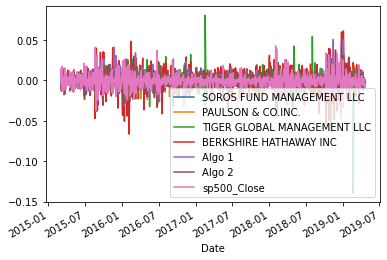

In [130]:
# Plot daily returns of all portfolios
joined_df_cols.plot()


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

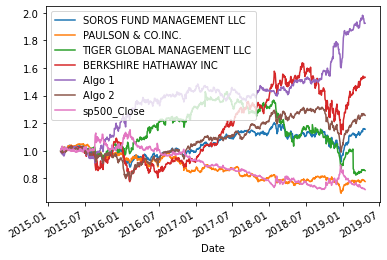

In [131]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df_cols).cumprod()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

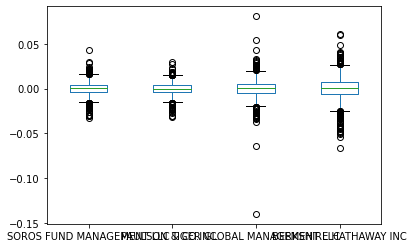

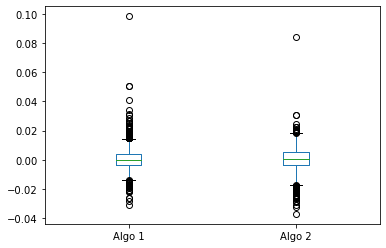

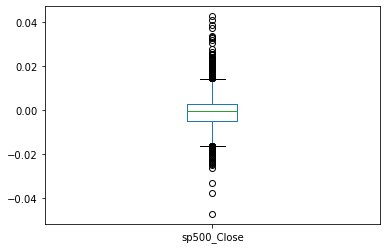

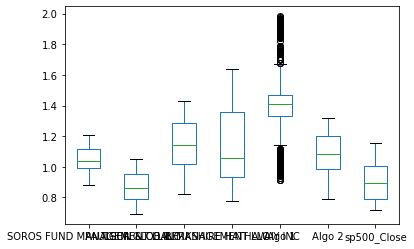

In [132]:
# Box plot to visually show risk
whale_returns_df.plot.box()
algo_return_df.plot.box()
sp500_daily_returns_df.plot.box()

cumulative_returns.plot.box()

### Calculate Standard Deviations

In [133]:
# Calculate the daily standard deviations of all portfolios
cumulative_returns_daily_std = cumulative_returns.std() # Daily Standard Deviations
cumulative_returns_daily_std

SOROS FUND MANAGEMENT LLC      0.073187
PAULSON & CO.INC.              0.088447
TIGER GLOBAL MANAGEMENT LLC    0.149652
BERKSHIRE HATHAWAY INC         0.241382
Algo 1                         0.231772
Algo 2                         0.131642
sp500_Close                    0.114846
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [134]:
# Calculate  the daily standard deviation of S&P 500
# Determine which portfolios are riskier than the S&P 500
sp500_daily_returns_df_std = sp500_daily_returns_df.std()
sp500_daily_returns_df_std

sp500_Close    0.008135
dtype: float64

In [135]:
whale_returns_df_std = whale_returns_df.std()
whale_returns_df_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [136]:
algo_return_df_std = algo_return_df.std()
algo_return_df_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Calculate the Annualized Standard Deviation

In [137]:
# Calculate the annualized standard deviation (252 trading days)
sp500_annualized_std = sp500_daily_returns_df_std * np.sqrt(252)
sp500_annualized_std

sp500_Close    0.129133
dtype: float64

In [138]:
algo_annualized_std = algo_return_df_std * np.sqrt(252)
algo_annualized_std

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [139]:
whale_annualized_std = whale_returns_df_std * np.sqrt(252)
whale_annualized_std

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [140]:
# calculate the cumulative annualualized std. THIS IS NOT A QUESTION FOR HOMEWORK
cumulative_annualized_std = cumulative_returns_daily_std * np.sqrt(252)
cumulative_annualized_std

SOROS FUND MANAGEMENT LLC      1.161806
PAULSON & CO.INC.              1.404053
TIGER GLOBAL MANAGEMENT LLC    2.375658
BERKSHIRE HATHAWAY INC         3.831820
Algo 1                         3.679263
Algo 2                         2.089756
sp500_Close                    1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

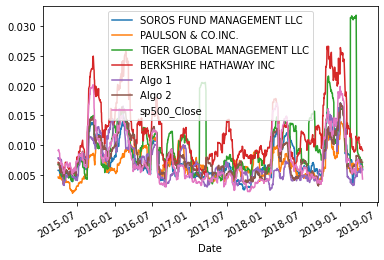

In [141]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
joined_df_cols.rolling(window=21).std().plot()

### Calculate and plot the correlation

In [142]:
# Calculate the correlation
joined_correlation = joined_df_cols.corr()

# Display de correlation matrix
joined_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
sp500_Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [1]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
# Computing beta
# Plot beta trend
algo1_rolling_covariance = algo_return_df['Algo 1'].rolling(window=60).cov(sp500_daily_returns_df['sp500_Close'])
sp500_rolling_variance = sp500_daily_returns_df['sp500_Close'].rolling(window=60).var()
rolling_beta = algo1_rolling_covariance / sp500_rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1 Portfolio')

NameError: name 'algo_return_df' is not defined

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [144]:
# Use `ewm` to calculate the rolling window
date = []
algo_return_df.ewm(halflife='21 days', date=pd.DatetimeIndex(date)).mean()

TypeError: ewm() got an unexpected keyword argument 'date'

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

SOROS FUND MANAGEMENT LLC      0.361568
PAULSON & CO.INC.             -0.462131
TIGER GLOBAL MANAGEMENT LLC   -0.118257
BERKSHIRE HATHAWAY INC         0.619628
dtype: float64

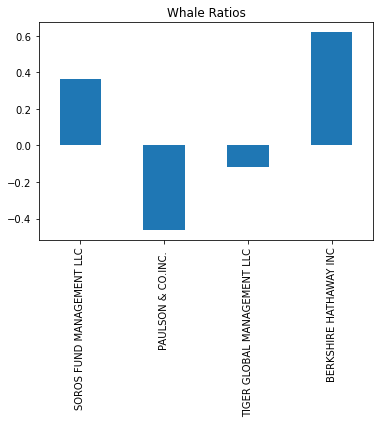

In [207]:
# Annualized Sharpe Ratios
# Visualize the sharpe ratios as a bar plot

whale_sharpe_ratios = (whale_returns_df.mean() * 252) / (whale_annualized_std)
whale_sharpe_ratios.plot(kind="bar", title="Whale Ratios")
whale_sharpe_ratios

Algo 1    1.300176
Algo 2    0.639258
dtype: float64

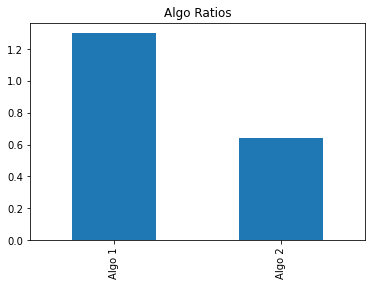

In [208]:
algo_sharpe_ratios = (algo_return_df.mean() * 252) / (algo_annualized_std)
algo_sharpe_ratios.plot(kind="bar", title="Algo Ratios")
algo_sharpe_ratios

sp500_Close   -0.774405
dtype: float64

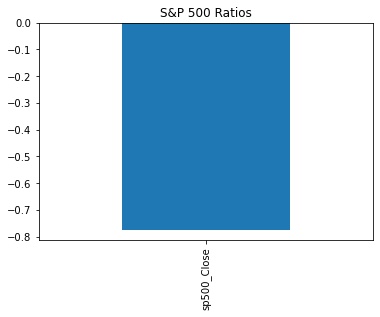

In [209]:
sp500_sharpe_ratios = (sp500_daily_returns_df.mean() * 252) / (sp500_annualized_std)
sp500_sharpe_ratios.plot(kind="bar", title="S&P 500 Ratios")
sp500_sharpe_ratios

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

The Algo portfolios ourperformed both the Whale's and S&P 500.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [166]:
# Reading data from 1st stock
aapl_historical_path = Path("/Users/aalfiler/Sites/hw_panda/panda-homework/A Whale off the Port(folio)/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_historical_path, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)


In [167]:
# Reading data from 2nd stock
goog_historical_path = Path("/Users/aalfiler/Sites/hw_panda/panda-homework/A Whale off the Port(folio)/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_historical_path, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)


In [168]:
# Reading data from 3rd stock
cost_historical_path = Path("/Users/aalfiler/Sites/hw_panda/panda-homework/A Whale off the Port(folio)/Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_historical_path, parse_dates=True, index_col='Trade DATE', infer_datetime_format=True)


In [171]:
# Combine all stocks in a single DataFrame
my_indiv_stocks_df = pd.concat([aapl_df, goog_df, cost_df], axis='rows', join='inner')
my_indiv_stocks_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [173]:
# Reset Date index
my_indiv_stocks_df = my_indiv_stocks_df.reset_index()

In [175]:
# Reorganize portfolio data by having a column per symbol
my_indiv_stocks_df = my_indiv_stocks_df.pivot_table(values="NOCP", index="Trade DATE", columns="Symbol")
my_indiv_stocks_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [177]:
# Calculate daily returns, drop NAs, and display sample data
my_indiv_stocks_returns = my_indiv_stocks_df.pct_change().dropna()
my_indiv_stocks_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [191]:
# Set weights, calculate portfolio return, and display sample data
weights = [1/3, 1/3, 1/3]

my_portfolio_returns = my_indiv_stocks_returns.dot(weights)
my_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [179]:
# Join your returns DataFrame to the original returns DataFrame
joined_all_cols = pd.concat([joined_df_cols, my_portfolio_returns], axis='columns', join='inner')
joined_all_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500_Close,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [180]:
columns = ["SOROS FUND MGMT LLC", "PAULSON & CO.INC.", "TIGER GLOBAL MGMT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1", "Algo 2", "S&P 500", "My Portfolio"]
joined_all_cols.columns = columns
joined_all_cols.head()

,SOROS FUND MGMT LLC,PAULSON & CO.INC.,TIGER GLOBAL MGMT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [181]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_all_cols = joined_all_cols.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [194]:
# Calculate the annualized `std`
my_daily_std = my_portfolio_returns.std()
my_annual_std = my_daily_std * np.sqrt(252)
my_annual_std

0.2102620573198797

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

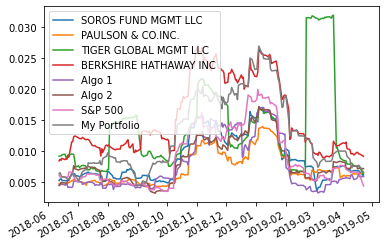

In [195]:
# Calculate rolling standard deviation and plo
joined_all_cols.rolling(window=21).std().plot()


### Calculate and plot the correlation

In [196]:
# Calculate the correlation
joined_all_correlation = joined_all_cols.corr()
joined_all_correlation

,SOROS FUND MGMT LLC,PAULSON & CO.INC.,TIGER GLOBAL MGMT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Portfolio
SOROS FUND MGMT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MGMT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
My Portfolio,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


<AxesSubplot:>

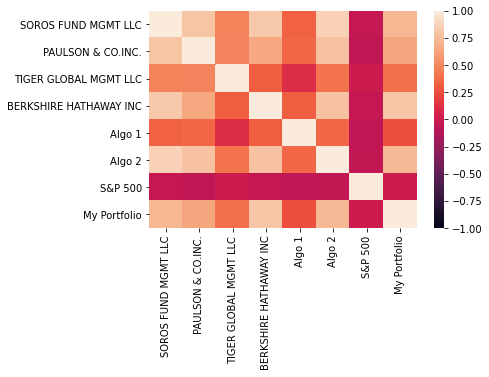

In [197]:
# Plot the correlation
sns.heatmap(joined_all_correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio vs S&P 500'}>

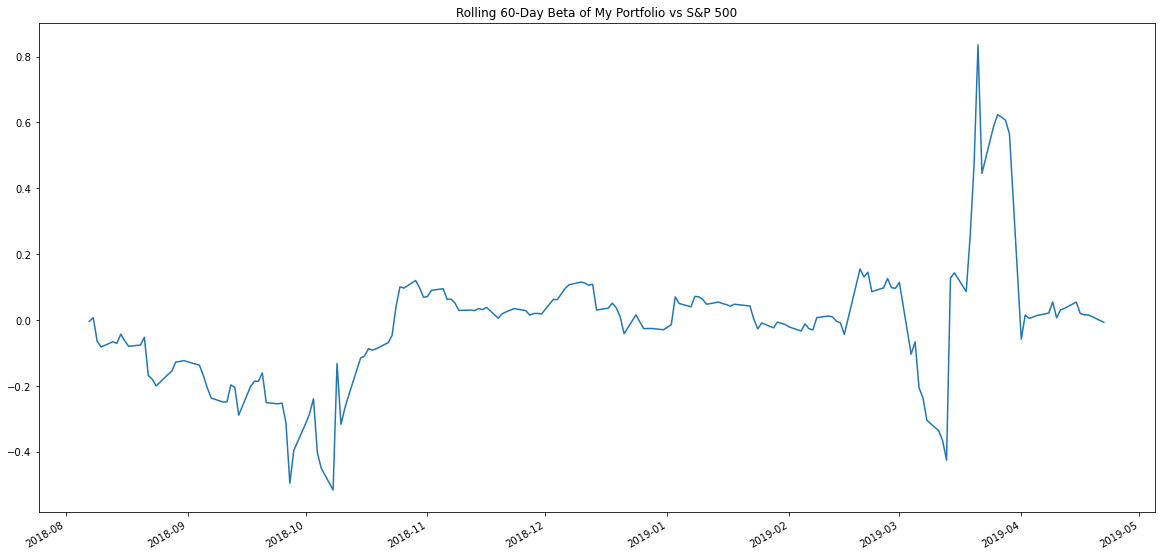

In [198]:
# Calculate and plot Beta
rolling_my_portfolio_cov = joined_all_cols['My Portfolio'].rolling(window=60).cov(joined_all_cols['S&P 500'])
rolling_my_portfolio_var = joined_all_cols['S&P 500'].rolling(window=30).var()


rolling_beta = rolling_my_portfolio_cov / rolling_my_portfolio_var
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio vs S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:title={'center':'My Sharpe Ratios'}, xlabel='Symbol'>

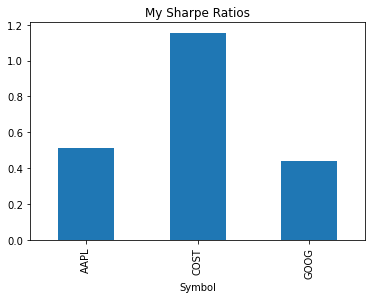

In [212]:
# Calculate Annualzied Sharpe Ratios and plot
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratios = (my_indiv_stocks_returns.mean() * 252) / (my_annual_std)
my_sharpe_ratios.plot(kind="bar", title="My Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [223]:
my_sharpe_ratios.mean()

0.7012802046628007

In [219]:
whale_sharpe_ratios.mean()

0.10020183623224177

In [220]:
algo_sharpe_ratios.mean()

0.969717097258333

In [221]:
sp500_sharpe_ratios.mean()

-0.7744051875147991

On average, my portfolio (0.70) did better than the Whales (0.10) and S&P500 (-0.77). However, the Algorithmic portfolio (0.96) did slightly bettert than my portfolio. 